In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
students ={
    'roll' : np.arange(1,101),
    'ut-1': np.random.randint(low = 5, high= 20, size = 100),
    'insem':np.random.randint(low = 5, high = 30, size = 100),
    'endsem': np.random.randint(low = 25, high = 70, size = 100)
}


In [3]:
df = pd.DataFrame(students)
df

,roll,ut-1,insem,endsem
0,1,15,15,38
1,2,19,25,53
2,3,17,23,62
3,4,13,17,34
4,5,18,15,38
...,...,...,...,...
95,96,7,28,54
96,97,5,15,64
97,98,7,5,42
98,99,8,25,39


In [4]:
df.dtypes

roll      int32
ut-1      int32
insem     int32
endsem    int32
dtype: object

In [5]:
df.isnull().sum()

roll      0
ut-1      0
insem     0
endsem    0
dtype: int64

In [6]:
index = [35,39,75]
for i in index:
    df.loc[df['roll']== i, ['insem','endsem']] = [None,None]

# df.loc[df['roll'] == 75]

In [7]:
df.isnull().sum()

roll      0
ut-1      0
insem     3
endsem    3
dtype: int64

In [8]:
df['insem'].fillna(method = 'bfill',inplace= True)
df['endsem'].fillna(method = 'bfill',inplace= True)
df.isnull().sum()

roll      0
ut-1      0
insem     0
endsem    0
dtype: int64

In [9]:
outlier = [35,27,65]
for i in outlier:
    df.loc[df['roll'] == i, ['insem', 'endsem']] = [-50,-100]

outlier1 = [15,48,87]
for i in outlier1:
    df.loc[df['roll'] == i, ['insem','endsem']] = [50,100]
    

<Axes: >

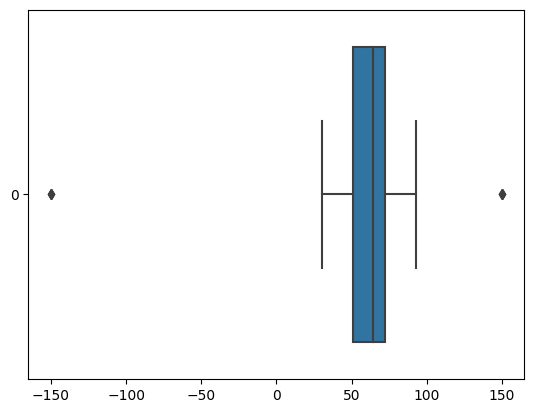

In [10]:
import seaborn as sns
df['total'] = df['insem'] + df['endsem']
sns.boxplot(df['total'], orient = 'h')

In [11]:
q1 = df['total'].quantile(0.25)
q3 = df['total'].quantile(0.75)
iqr = q3 - q1

In [25]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

lower_array = np.where(df['total'] <= lower)[0]
upper_array = np.where(df['total'] >= upper)[0]

print(lower_array)
print(upper_array)


[]
[]


In [13]:
df.drop(index = upper_array, inplace = True)
df.drop(index = lower_array, inplace = True)

<Axes: >

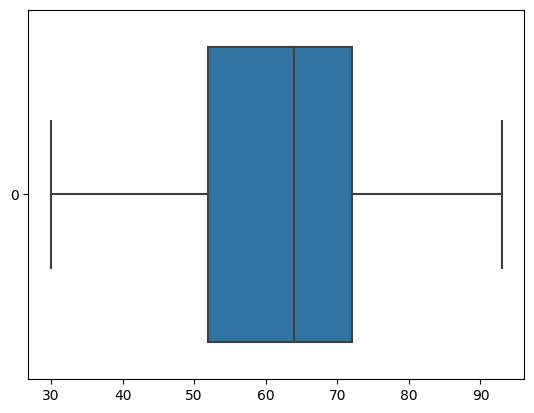

In [14]:
sns.boxplot(df['total'], orient = 'h')

### skewness

<Axes: xlabel='total', ylabel='Count'>

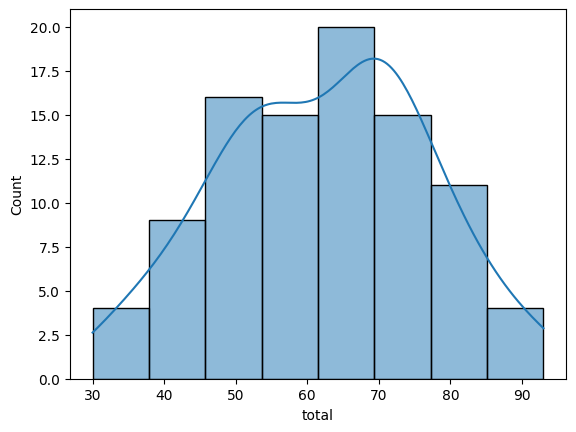

In [15]:
sns.histplot(df['total'],kde = True)

In [16]:
from scipy import stats

skewness = stats.skew(df['total'])
print(skewness)

-0.09143915053195553


In [30]:
total = df['total']
#apply box-cox
transformed_data,lambda_value = stats.boxcox(total)
skew = stats.skew(transformed_data)
print(skew)
print(lambda_value)

-0.05785291586007971
1.0672486471820712


<Axes: xlabel='total', ylabel='Count'>

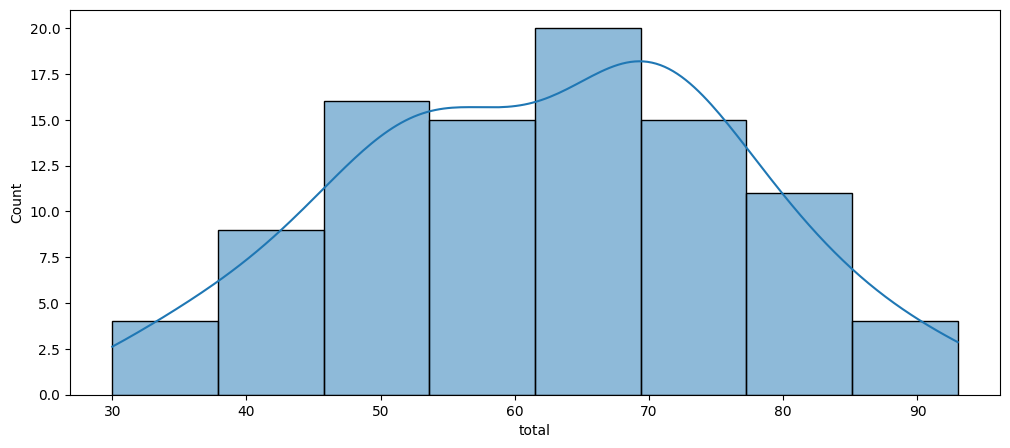

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(total,kde = True)

<Axes: ylabel='Count'>

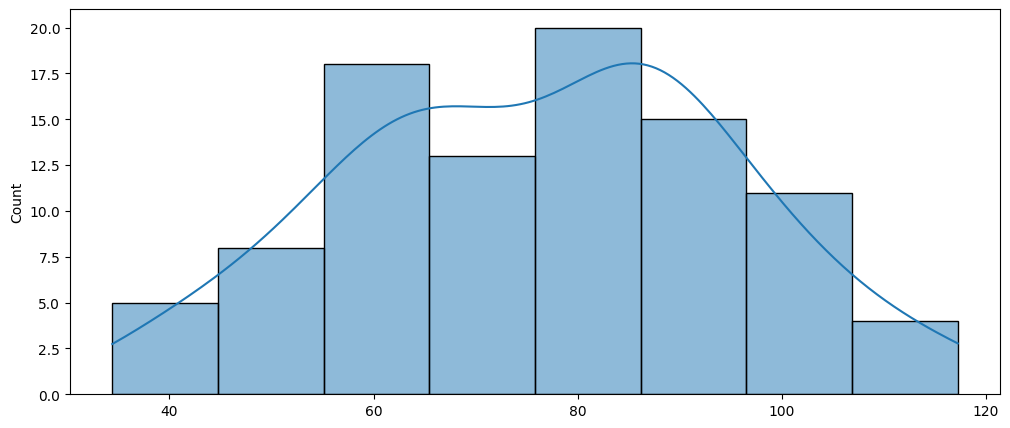

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(transformed_data, kde = True)

### Normalization

In [31]:
from sklearn.preprocessing import Normalizer
scaler =Normalizer()
columns = pd.DataFrame(data = df, columns = ['total'])
scaled_data = scaler.fit_transform(columns)
print(scaled_data)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [29]:
scale_df = pd.DataFrame(scaled_data, columns = ['total'])
scale_df.head(10)

,total
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


<Axes: xlabel='total', ylabel='Count'>

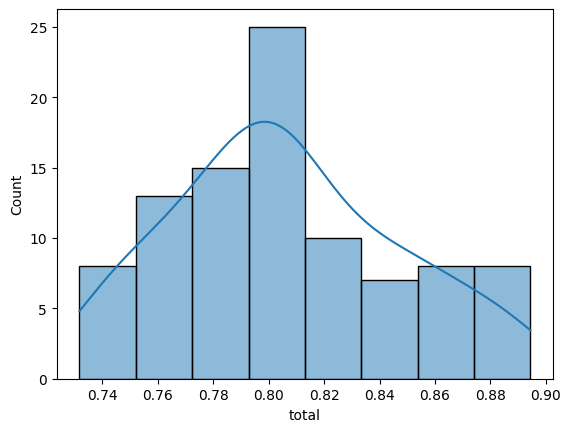

In [22]:
sns.histplot(scale_df['total'],kde = True)